# Scotland Baby Names 1974-2022

The National Records of Scotland has made available data on registered baby names from 1974 through the present.
<br>Full List 1974 - 2022 in CSV format can be found here: https://www.nrscotland.gov.uk/statistics-and-data/statistics/statistics-by-theme/vital-events/names/babies-first-names/babies-first-names-2022
<br><br>
In this project, I would like to do some data manipulation in Python and try to explore the following topics:
1. Total births by sex and year
2. Names that show a surging popularity vs consistent popularity over time
3. Trend in naming choices
4. The distribution of baby names by the first letter over time
5. Trending gender-neutral baby names

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
names = pd.read_csv("babies-first-names-all-names-all-years.csv")

In [3]:
names=names[["yr","sex","FirstForename","number","rank"]]

In [4]:
names.dtypes

yr                int64
sex              object
FirstForename    object
number            int64
rank              int64
dtype: object

In [5]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264149 entries, 0 to 264148
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   yr             264149 non-null  int64 
 1   sex            264149 non-null  object
 2   FirstForename  264149 non-null  object
 3   number         264149 non-null  int64 
 4   rank           264149 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 10.1+ MB


In [6]:
names

,yr,sex,FirstForename,number,rank
0,1974,B,Aamir,1,472
1,1974,B,Aaron,17,139
2,1974,B,Abdul,5,248
3,1974,B,Abdullahi,1,472
4,1974,B,Abdulrazak,1,472
...,...,...,...,...,...
264144,2022,G,Zunaira,1,1515
264145,2022,G,Zuriel,1,1515
264146,2022,G,Zuzzanna,1,1515
264147,2022,G,Zya,1,1515


Total number of registered births by sex from 1974 to 2022

In [7]:
names.groupby("sex")["number"].sum()

sex
B    1497467
G    1421143
Name: number, dtype: int64

Number of registered births by year and sex

In [8]:
total_number_by_year = names.pivot_table("number",index="yr",columns="sex",aggfunc=sum)
total_number_by_year.head(10)

sex,B,G
yr,,
1974,35773,34228
1975,34965,32897
1976,33465,31364
1977,31954,30318
1978,33031,31221
1979,35323,33004
1980,35367,33474
1981,35266,33755
1982,33895,32270


Another way to achieve the same result as above

In [9]:
total_number_by_year_2 = names.groupby(["yr","sex"])["number"].sum().unstack()
total_number_by_year_2.head(10)

sex,B,G
yr,,
1974,35773,34228
1975,34965,32897
1976,33465,31364
1977,31954,30318
1978,33031,31221
1979,35323,33004
1980,35367,33474
1981,35266,33755
1982,33895,32270


Visualise the above table to investigate the birth rate trend of Scotland in the last five decades

<Axes: title={'center': 'Total births by year and sex'}, xlabel='year', ylabel='births'>

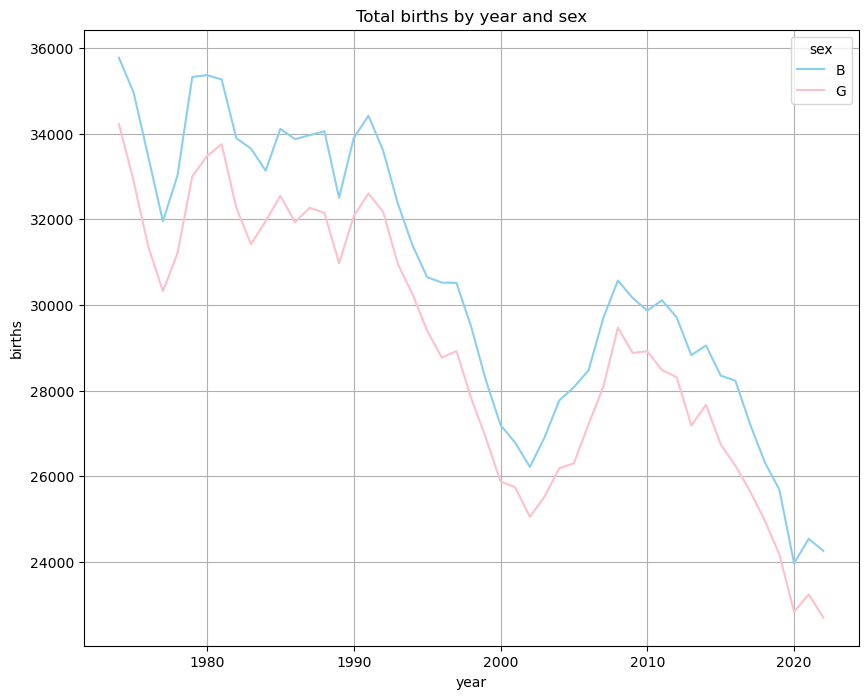

In [10]:
total_number_by_year.plot.line(title="Total births by year and sex",
                            style={'B': "#89CFF0", 'G': 'pink'},
                            xlabel="year",ylabel="births",grid=True,figsize=(10,8)) 

At first glance, I thought something was off, as it appears there are always more boys than girls in Scotland, which seems a little strange to me.
I then performed a check online and can confirm that it indeed is the case in Scotland.

Fun fact: The disparity shrank to 949 in 2010, the year with the smallest difference to date.

Next, I am interested to know which boy's name ranked most frequently in the top 10 over the years.

In [11]:
most_popular_b = names[(names["rank"]<=10) & (names["sex"]=="B")].groupby(["sex","FirstForename"])["number"].count().reset_index(name="count")
most_popular_b.nlargest(1,["count"],keep="all")

,sex,FirstForename,count
21,B,James,49


The dataset contains data from 1974–2022 (49 years), and James is the only name that has been ranked in the top 10 boy names every year. 

Which girl's name ranked most frequently on the top 10 over the years?

In [12]:
most_popular_g = names[(names["rank"]<=10) & (names["sex"]=="G")].groupby(["sex","FirstForename"])["number"].count().reset_index(name="count")
most_popular_g.nlargest(1,["count"],keep="all")

,sex,FirstForename,count
13,G,Emma,31


Between 1974 and 2022, the name Emma appeared 31 times in the top 10 girl names.

Another approach to the above questions

In [13]:
most_popular = names[names["rank"]<=10].groupby(["sex","FirstForename"],as_index=False)["number"].count()
most_popular.groupby("sex").apply(lambda x:x.FirstForename[x.number.idxmax()])

sex
B    James
G     Emma
dtype: object

Next, let's insert a column that shows the percentage of babies given a particular name in a given year.

In [14]:
def add_pct(group):
    group["pct"]=100.0*group["number"]/group["number"].sum()
    return group

names=names.groupby(["yr","sex"],as_index=False).apply(add_pct).droplevel(0)

In [15]:
names.head(10)

,yr,sex,FirstForename,number,rank,pct
0,1974,B,Aamir,1,472,0.002795
1,1974,B,Aaron,17,139,0.047522
2,1974,B,Abdul,5,248,0.013977
3,1974,B,Abdullahi,1,472,0.002795
4,1974,B,Abdulrazak,1,472,0.002795
5,1974,B,Abid,2,346,0.005591
6,1974,B,Abraham,1,472,0.002795
7,1974,B,Adam,75,78,0.209655
8,1974,B,Adebayo,1,472,0.002795
9,1974,B,Adel,1,472,0.002795


Take Adam as an example: there were 35773 baby boys registered in 1974, and 75 of them were named Adam. That accounts for 0.209655%.

Just to ensure the pct column adds to 100% across all groupings.

In [16]:
names.groupby(["yr","sex"])["pct"].sum()

yr    sex
1974  B      100.0
      G      100.0
1975  B      100.0
      G      100.0
1976  B      100.0
             ...  
2020  G      100.0
2021  B      100.0
      G      100.0
2022  B      100.0
      G      100.0
Name: pct, Length: 98, dtype: float64

Next, I'd like to slightly alter the question to see if I can make any new discoveries.

<br>Top 10 name(s) given to a boy relative to the total number of boys in a particular year

In [17]:
names[names["sex"]=="B"].nlargest(10,"pct",keep="all")

,yr,sex,FirstForename,number,rank,pct
16550,1979,B,David,2024,1,5.729978
13147,1978,B,David,1861,1,5.634101
20039,1980,B,David,1988,1,5.621059
30657,1983,B,David,1891,1,5.619447
23525,1981,B,David,1965,1,5.571939
9837,1977,B,David,1761,1,5.511047
27134,1982,B,David,1856,1,5.475734
34228,1984,B,David,1785,1,5.386890
6586,1976,B,David,1744,1,5.211415
37875,1985,B,David,1769,1,5.185706


David was the most popular name for baby boys between the 70s and the 80s. Over 5 out of every 100 baby boys were given this particular name.

Top 10 name(s) given to a girl relative to the total number of girls in a particular year

In [18]:
names[names["sex"]=="G"].nlargest(10,"pct",keep="all")

,yr,sex,FirstForename,number,rank,pct
40156,1985,G,Laura,1266,1,3.889401
32778,1983,G,Laura,1215,1,3.867087
36375,1984,G,Laura,1185,1,3.708224
25724,1981,G,Laura,1181,1,3.498741
47810,1987,G,Laura,1119,1,3.467724
29298,1982,G,Laura,1111,1,3.442826
96173,1998,G,Chloe,953,1,3.425224
100920,1999,G,Chloe,917,1,3.408795
51800,1988,G,Laura,1095,1,3.406016
43911,1986,G,Laura,1038,1,3.250352


And for girls, it's the name Laura that was shared by many baby girls throughout the 80s.

Now we have two pairs of names:
1) James and Emma appeared most frequently in the top 10 boy names and top 10 girl names, respectively
2) David and Laura were once the names shared by most boys and most girls, respectively at a given year  

How does the trend for these names go?

array([<Axes: xlabel='year', ylabel='births'>,
       <Axes: xlabel='year', ylabel='births'>,
       <Axes: xlabel='year', ylabel='births'>,
       <Axes: xlabel='year', ylabel='births'>], dtype=object)

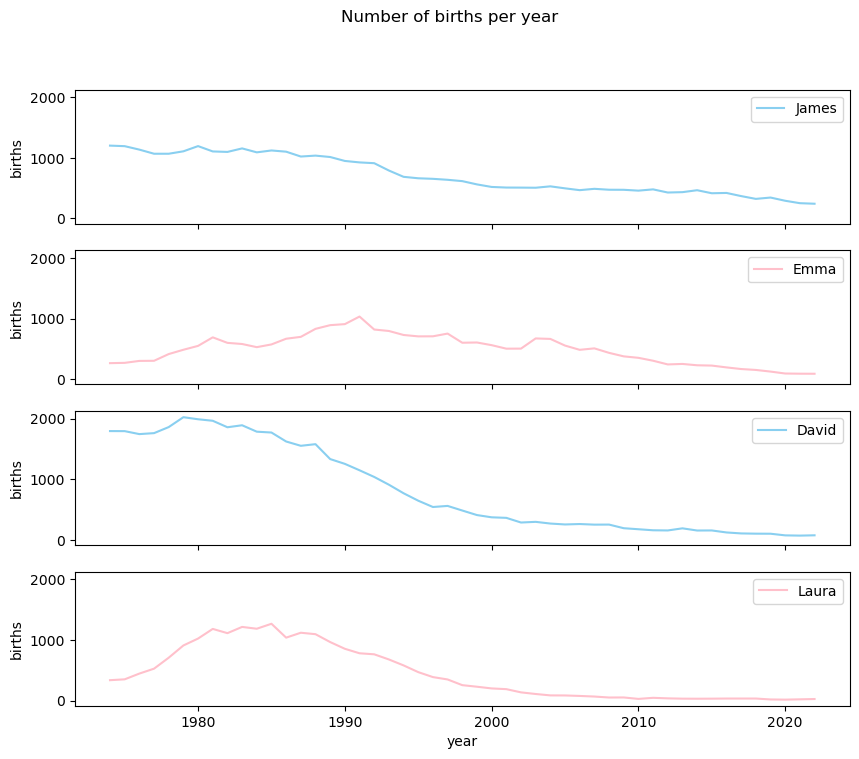

In [19]:
trend = names.pivot_table("number",index="yr",columns="FirstForename",aggfunc=sum)
popular_names = trend[["James","Emma","David","Laura"]]
popular_names.plot(subplots=True,figsize=(10,8),
                   title="Number of births per year",
                   sharey=True,
                   sharex=True,
                   xlabel="year",
                   ylabel="births",
                   color={'James': "#89CFF0", "Emma": 'pink','David': "#89CFF0", "Laura": 'pink'})

*Please note that the above data manipulation neglected a very small number of individuals with the same name but the opposite sex. For example, for every 2917 boys named James, only one girl also named James. Similarly, for every 4010 girls named Emma, only one boy also named Emma. Given the significant  disparity, I believe it has no impact on the outcomes.*

James and Emma, the names that had the most appearances on the top 10 ranking list over the years, show a more stable and consistent trend than David and Laura, whose popularity surged in the 80s and 90s and then fell out of favour ever since.

The decline in popularity of names above led me to consider another hypothesis: could it be that parents of the post-'90s generation tend to choose unique names for their babies?

In [20]:
cumsum=names.sort_values(by=["yr","pct"],ascending=[True,False])
cumsum["cumsum"]=cumsum.groupby(["yr","sex"])["pct"].transform(pd.Series.cumsum)
cumsum

,yr,sex,FirstForename,number,rank,pct,cumsum
272,1974,B,David,1794,1,5.014955,5.014955
553,1974,B,John,1528,2,4.271378,9.286333
856,1974,B,Paul,1260,3,3.522209,12.808543
724,1974,B,Mark,1234,4,3.449529,16.258072
514,1974,B,James,1202,5,3.360076,19.618148
...,...,...,...,...,...,...,...
259737,2022,B,Zubayr,1,1328,0.004123,99.983509
259738,2022,B,Zuhair,1,1328,0.004123,99.987631
259739,2022,B,Zureb,1,1328,0.004123,99.991754
259740,2022,B,Zuriel,1,1328,0.004123,99.995877


In [21]:
cumsum=cumsum[cumsum["cumsum"]<=30]
cumsum_per_year = cumsum.groupby(["yr","sex"])["cumsum"].count()+1
cumsum_per_year

yr    sex
1974  B       9
      G      17
1975  B       9
      G      18
1976  B      10
             ..
2020  G      39
2021  B      36
      G      40
2022  B      36
      G      41
Name: cumsum, Length: 98, dtype: int64

<Axes: title={'center': 'Number of popular names in the top 30%'}, xlabel='year'>

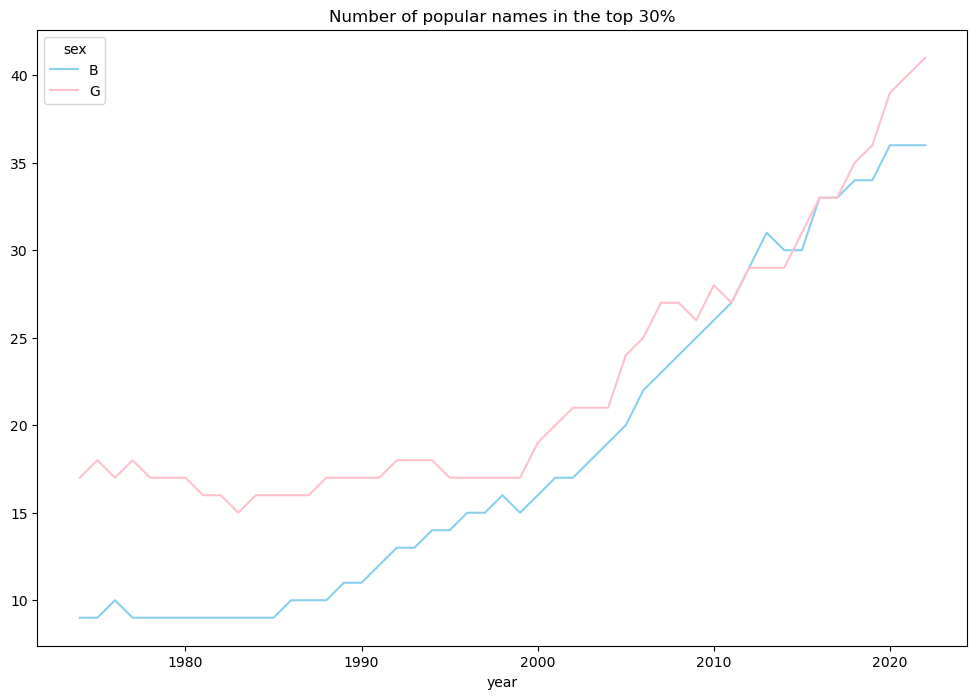

In [22]:
cumsum_per_year.unstack().plot(color={'B': "#89CFF0", 'G': 'pink'},
                              title="Number of popular names in the top 30%",
                              xlabel="year",
                              figsize=(12,8))

As we can see, girls' names have consistently been more varied than boys' names. Additionally, it seems that there indeed has been a rise in name diversity since the 90s. It could be attributed to parents opting for unique variations of classic names or perhaps being influenced by popular culture at that time.

Next, we look at the distribution of baby names by first letter.

In [23]:
def get_first_letter(x):
    return x[0]

first_letters = names["FirstForename"].map(get_first_letter)
first_letters.name="first_letter"

table=names.pivot_table("number",index=first_letters,columns=["sex","yr"],aggfunc=sum)

subset = table.reindex(columns=[1980,1990,2000,2010,2020],level="yr")
subset

sex                B                                       G                  \
yr              1980    1990    2000    2010    2020    1980    1990    2000   
first_letter                                                                   
A             3637.0  2931.0  2508.0  3342.0  2757.0  2662.0  2976.0  2810.0   
B             1424.0   835.0  1180.0  1036.0   994.0   181.0   209.0   725.0   
C             2806.0  3579.0  3071.0  2988.0  2068.0  3244.0  2782.0  3231.0   
D             3574.0  3534.0  2036.0  1589.0   730.0  1621.0  1208.0   464.0   
E              425.0   433.0   734.0  1018.0   819.0  1574.0  1752.0  2429.0   
F              324.0   409.0   536.0   946.0  1250.0   745.0   464.0   222.0   
G             3069.0  2228.0   654.0   392.0   394.0   940.0   822.0   434.0   
H              155.0   171.0   369.0   945.0  1179.0   669.0  1007.0  1007.0   
I              789.0   469.0   173.0   261.0   356.0   135.0   110.0   336.0   
J             3734.0  3900.0  3931.0  3614.0  2367.0  2937.0  2424.0  1402.0   
K             1573.0  1210.0  1401.0  1654.0   893.0  3064.0  3347.0  2035.0   
L              492.0  1069.0  2088.0  2853.0  2138.0  6133.0  3918.0  2220.0   
M             2650.0  3074.0  1819.0  2037.0  1648.0  2027.0  1678.0  1956.0   
N              735.0   606.0   529.0   682.0   663.0  1233.0  1926.0  1089.0   
O               67.0   110.0   277.0   928.0   939.0    18.0    34.0   252.0   
P             1708.0  1047.0   377.0   261.0   229.0   800.0   304.0   195.0   
Q                4.0    11.0    13.0    22.0    29.0     1.0     2.0     NaN   
R             2822.0  2731.0  2552.0  2229.0  1833.0   781.0  1777.0  1902.0   
S             3969.0  4402.0  1858.0  1331.0   787.0  3081.0  4150.0  2134.0   
T              649.0   576.0   672.0   885.0  1113.0   688.0   440.0   574.0   
U                5.0    16.0    20.0    21.0    14.0     7.0     8.0    14.0   
V               23.0    27.0    22.0    69.0    77.0   573.0   440.0   118.0   
W              699.0   480.0   222.0   301.0   213.0   112.0    30.0    23.0   
X                NaN     NaN     8.0    38.0    37.0     NaN     3.0     6.0   
Y               15.0    16.0    16.0    66.0    87.0   170.0    82.0    55.0   
Z               19.0    32.0   130.0   360.0   354.0    78.0   178.0   247.0   

sex                           
yr              2010    2020  
first_letter                  
A             3786.0  3398.0  
B              704.0   624.0  
C             1989.0  1013.0  
D              548.0   464.0  
E             3348.0  2711.0  
F              544.0   671.0  
G              577.0   660.0  
H             1053.0  1163.0  
I              961.0  1072.0  
J              937.0   546.0  
K             2008.0   633.0  
L             2713.0  1731.0  
M             2763.0  2315.0  
N              894.0   635.0  
O              763.0   633.0  
P              487.0   560.0  
Q               11.0    58.0  
R             1231.0  1249.0  
S             2283.0  1578.0  
T              554.0   293.0  
U               23.0    22.0  
V              145.0   206.0  
W               84.0   213.0  
X               13.0     9.0  
Y               81.0    50.0  
Z              419.0   330.0

In [24]:
first_letter_pct = 100.0*subset/subset.sum()
first_letter_pct

sex                   B                                              \
yr                 1980       1990       2000       2010       2020   
first_letter                                                          
A             10.283598   8.647038   9.221944  11.189233  11.502837   
B              4.026352   2.463418   4.338873   3.468595   4.147196   
C              7.933950  10.558768  11.292102  10.004018   8.628171   
D             10.105466  10.426009   7.486395   5.320075   3.045728   
E              1.201685   1.277437   2.698926   3.408330   3.417056   
F              0.916108   1.206632   1.970878   3.167269   5.215287   
G              8.677581   6.573047   2.404765   1.312441   1.643858   
H              0.438262   0.504484   1.356817   3.163921   4.919059   
I              2.230893   1.383644   0.636123   0.873845   1.485314   
J             10.557865  11.505782  14.454332  12.099906   9.875668   
K              4.447649   3.569743   5.151493   5.537699   3.725801   
L              1.391127   3.153764   7.677600   9.552029   8.920227   
M              7.492861   9.068917   6.688484   6.820008   6.875834   
N              2.078208   1.787822   1.945139   2.283380   2.766188   
O              0.189442   0.324522   1.018532   3.107004   3.917724   
P              4.829361   3.088860   1.386233   0.873845   0.955441   
Q              0.011310   0.032452   0.047801   0.073657   0.120995   
R              7.979190   8.056998   9.383733   7.462836   7.647697   
S             11.222326  12.986783   6.831887   4.456274   3.283545   
T              1.835044   1.699316   2.470952   2.963037   4.643692   
U              0.014137   0.047203   0.073540   0.070309   0.058411   
V              0.065032   0.079655   0.080894   0.231016   0.321262   
W              1.976419   1.416096   0.816297   1.007768   0.888685   
X                   NaN        NaN   0.029416   0.127226   0.154372   
Y              0.042412   0.047203   0.058832   0.220972   0.362984   
Z              0.053722   0.094406   0.478011   1.205303   1.476969   

sex                   G                                              
yr                 1980       1990       2000       2010       2020  
first_letter                                                         
A              7.952441   9.279411  10.857805  13.091739  14.879362  
B              0.540718   0.651679   2.801391   2.434386   2.732408  
C              9.691104   8.674503  12.484544   6.877831   4.435784  
D              4.842564   3.766643   1.792890   1.894948   2.031791  
E              4.702157   5.462879   9.385626  11.577164  11.871086  
F              2.225608   1.446790   0.857805   1.881116   2.938214  
G              2.808150   2.563063   1.676971   1.995228   2.890047  
H              1.998566   3.139908   3.891036   3.641205   5.092613  
I              0.403298   0.342989   1.298300   3.323075   4.694137  
J              8.773974   7.558230   5.417311   3.240084   2.390857  
K              9.153373  10.436220   7.863215   6.943532   2.771818  
L             18.321682  12.216644   8.578053   9.381376   7.579805  
M              6.055446   5.232141   7.557960   9.554272  10.137058  
N              3.683456   6.005425   4.207883   3.091393   2.780575  
O              0.053773   0.106015   0.973725   2.638404   2.771818  
P              2.389915   0.947897   0.753478   1.684014   2.452161  
Q              0.002987   0.006236        NaN   0.038037   0.253974  
R              2.333154   5.540831   7.349304   4.256717   5.469195  
S              9.204158  12.940039   8.245750   7.894464   6.909839  
T              2.055327   1.371956   2.217929   1.915696   1.283006  
U              0.020912   0.024945   0.054096   0.079532   0.096335  
V              1.711776   1.371956   0.455951   0.501400   0.902045  
W              0.334588   0.093542   0.088872   0.290466   0.932697  
X                   NaN   0.009354   0.023184   0.044953   0.039410  
Y              0.507857   0.255683   0.212519   0.

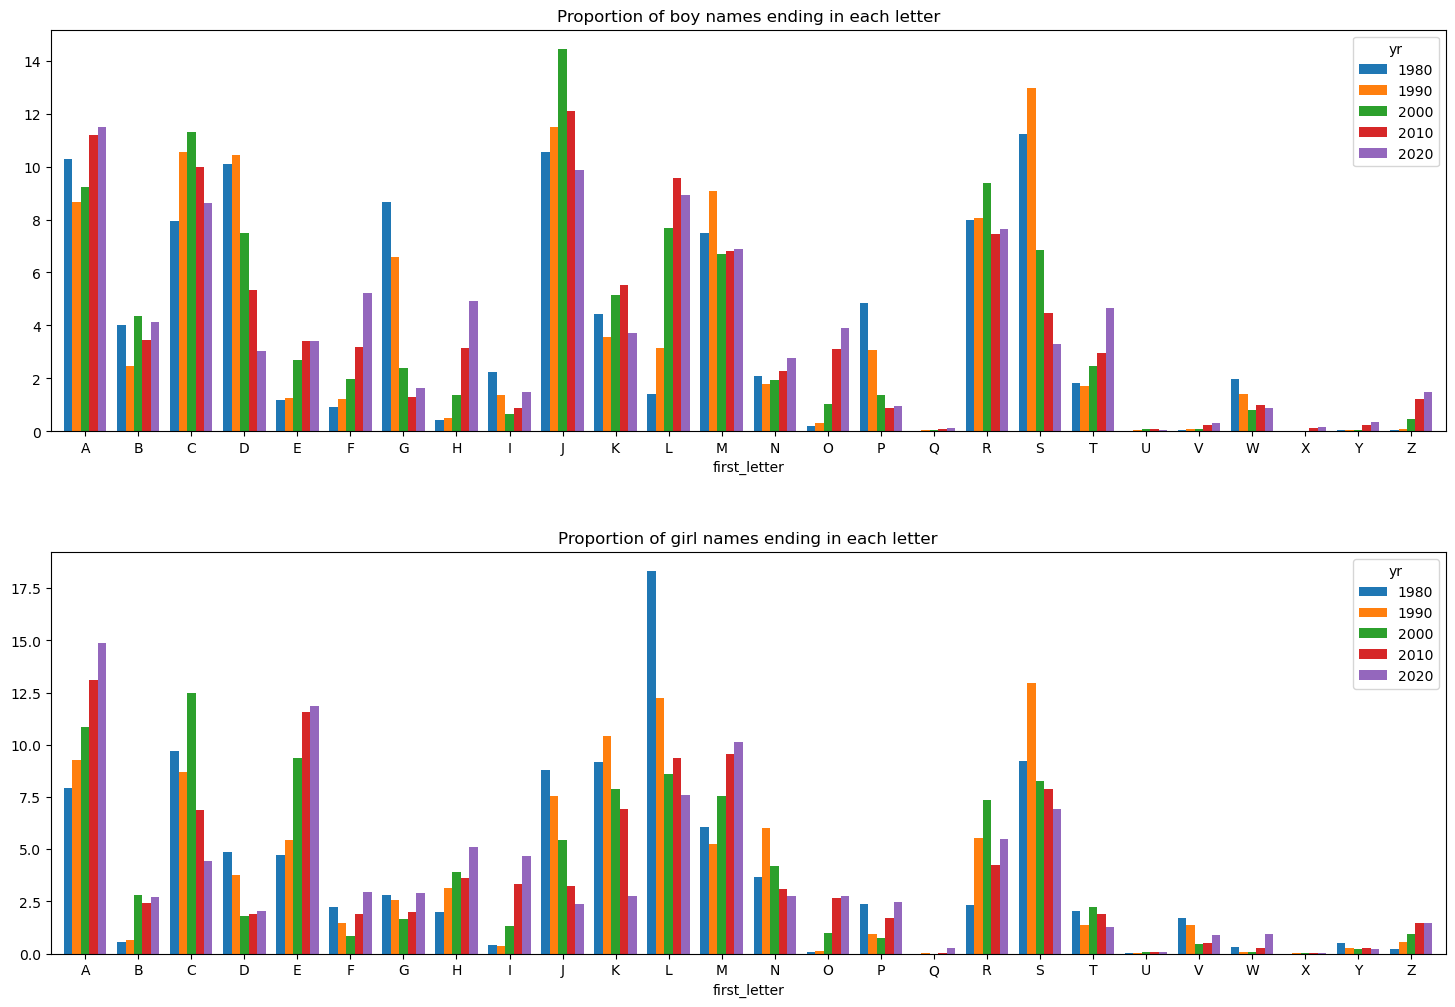

In [25]:
fig,axes = plt.subplots(2,1,figsize=(18,12))
first_letter_pct["B"].plot(kind="bar",rot=0,ax=axes[0],title="Proportion of boy names ending in each letter",width=0.8)
first_letter_pct["G"].plot(kind="bar",rot=0,ax=axes[1],title="Proportion of girl names ending in each letter",width=0.8)

fig.subplots_adjust(wspace=0.1,hspace=0.3)

For boys, the first letters F, H, and O have experienced significant growth, while letters D, G, P, and S have experienced a significant decline.

For girls, the first letters A, E, and I have experienced significant growth, while letters D, J, K, and S have experienced a significant decline.

I'll choose a subset of letters for the girl's names and the boy's names separately and chart their historical trends.

In [26]:
first_letter_pct_full = 100.0*table / table.sum()
trend_lines_b = first_letter_pct_full.loc[["H","D"],"B"].T
trend_lines_b.head()

first_letter,H,D
yr,,
1974,0.598217,10.124955
1975,0.514801,10.118690
1976,0.531899,10.410877
1977,0.485072,10.239720
1978,0.454119,10.487118


In [27]:
trend_lines_g = first_letter_pct_full.loc[["A","S"],"G"].T
trend_lines_g.head()

first_letter,A,S
yr,,
1974,9.763936,10.541077
1975,9.730371,10.192419
1976,9.383369,9.756409
1977,9.004552,9.601557
1978,8.551936,9.484001


<Axes: title={'center': 'Proportion of girls born with names starting in A vs S over time'}, xlabel='year'>

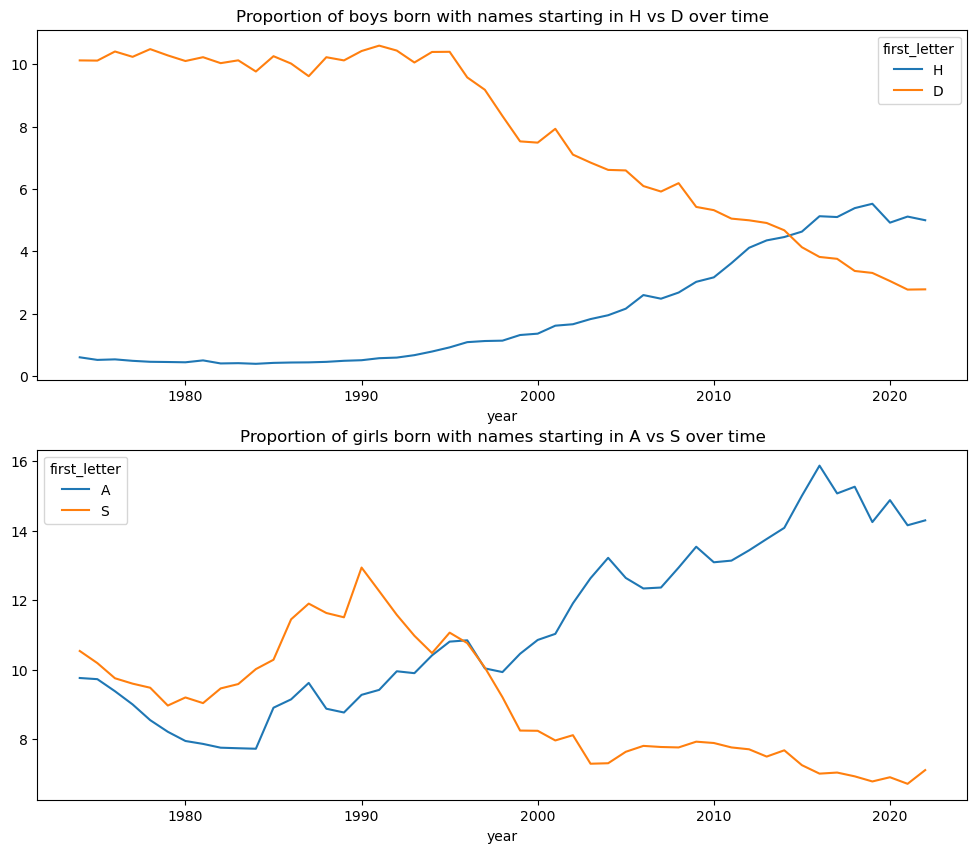

In [28]:
fig,axes=plt.subplots(2,1,figsize=(12,10))
trend_lines_b.plot(kind="line",rot=0,ax=axes[0],title="Proportion of boys born with names starting in H vs D over time",xlabel="year")
trend_lines_g.plot(kind="line",rot=0,ax=axes[1],title="Proportion of girls born with names starting in A vs S over time",xlabel="year")

Gender-neutral names have become more popular recently, reflecting shifting views on gender roles.

To find out popular unisex names, we first select those registered by at least, say, 500 boys and 500 girls between 1974 and 2022.

In [29]:
names_subtable=names[["yr","sex","FirstForename","number"]]
b_names = names_subtable[names_subtable["sex"]=="B"]
b_names = b_names.groupby("FirstForename").filter(lambda x: x["number"].sum()>=500).drop_duplicates(subset="FirstForename")["FirstForename"]
b_names.count()

291

In [30]:
g_names = names_subtable[names_subtable["sex"]=="G"]
g_names = g_names.groupby("FirstForename").filter(lambda x: x["number"].sum()>=500).drop_duplicates(subset="FirstForename")["FirstForename"]
g_names.count()

409

In [31]:
unisex_names = pd.merge(b_names,g_names,how="inner",on=["FirstForename"])["FirstForename"]
unisex_names

0       Alex
1      Ellis
2      Jamie
3        Lee
4     Morgan
5      Rowan
6     Taylor
7    Charlie
8     Jordan
9     Harley
Name: FirstForename, dtype: object

Now we have 10 names and each of the names was at least registered by 500 boys and 500 girls. 

Going back to the full table with yearly numbers, we can dig further into the story.

In [32]:
names_subtable = names_subtable[names_subtable["FirstForename"].isin(unisex_names)]
names_subtable

,yr,sex,FirstForename,number
37,1974,B,Alex,4
345,1974,B,Ellis,1
515,1974,B,Jamie,88
659,1974,B,Lee,209
768,1974,B,Morgan,4
...,...,...,...,...
260075,2022,G,Ellis,10
260122,2022,G,Alex,8
260251,2022,G,Morgan,6
260268,2022,G,Taylor,6


Since the dataset contains data for 49 years, we conveniently split them into seven periods.

In [33]:
names_subtable["period"] = names_subtable["yr"].apply(lambda x: x//7*7)
names_subtable["period"] =np.where(names_subtable["period"]==1974,"1974-1980",
    np.where(names_subtable["period"]==1981,"1981-1987",
    np.where(names_subtable["period"]==1988,"1988-1994",
    np.where(names_subtable["period"]==1995,"1995-2001",
    np.where(names_subtable["period"]==2002,"2002-2008",
    np.where(names_subtable["period"]==2009,"2009-2015",
    np.where(names_subtable["period"]==2016,"2016-2022","")))))))

names_subtable

,yr,sex,FirstForename,number,period
37,1974,B,Alex,4,1974-1980
345,1974,B,Ellis,1,1974-1980
515,1974,B,Jamie,88,1974-1980
659,1974,B,Lee,209,1974-1980
768,1974,B,Morgan,4,1974-1980
...,...,...,...,...,...
260075,2022,G,Ellis,10,2016-2022
260122,2022,G,Alex,8,2016-2022
260251,2022,G,Morgan,6,2016-2022
260268,2022,G,Taylor,6,2016-2022


In [34]:
names_subtable= names_subtable.reset_index(drop=True)
names_subtable.sort_values(by=["FirstForename","period"],inplace=True)
names_subtable

,yr,sex,FirstForename,number,period
0,1974,B,Alex,4,1974-1980
7,1974,G,Alex,1,1974-1980
10,1975,B,Alex,9,1974-1980
20,1976,B,Alex,3,1974-1980
27,1976,G,Alex,1,1974-1980
...,...,...,...,...,...
819,2020,G,Taylor,16,2016-2022
829,2021,B,Taylor,11,2016-2022
837,2021,G,Taylor,12,2016-2022
845,2022,B,Taylor,12,2016-2022


In [35]:
popular_unisex_names = names_subtable.pivot_table(index=["FirstForename","period"],columns=["sex"],values="number",aggfunc="sum",fill_value=0)
popular_unisex_names["% B"]=popular_unisex_names["B"]/(popular_unisex_names["B"]+popular_unisex_names["G"])*100.0
popular_unisex_names["% G"]=popular_unisex_names["G"]/(popular_unisex_names["B"]+popular_unisex_names["G"])*100.0
popular_unisex_names["% diff"]=abs(popular_unisex_names["% B"]-popular_unisex_names["% G"])
popular_unisex_names.reset_index(inplace=True)
popular_unisex_names

sex,FirstForename,period,B,G,% B,% G,% diff
0,Alex,1974-1980,31,3,91.176471,8.823529,82.352941
1,Alex,1981-1987,68,2,97.142857,2.857143,94.285714
2,Alex,1988-1994,109,64,63.005780,36.994220,26.011561
3,Alex,1995-2001,229,218,51.230425,48.769575,2.460850
4,Alex,2002-2008,464,371,55.568862,44.431138,11.137725
...,...,...,...,...,...,...,...
64,Taylor,1988-1994,145,163,47.077922,52.922078,5.844156
65,Taylor,1995-2001,536,825,39.382807,60.617193,21.234386
66,Taylor,2002-2008,710,718,49.719888,50.280112,0.560224
67,Taylor,2009-2015,398,432,47.951807,52.048193,4.096386


Unisex names that are trending (2016-2022)

In [36]:
recently_popular = popular_unisex_names[(popular_unisex_names["period"]=="2016-2022") & (popular_unisex_names["% diff"]<=25)]
recently_popular.sort_values(by="% diff")

sex,FirstForename,period,B,G,% B,% G,% diff
61,Rowan,2016-2022,284,286,49.824561,50.175439,0.350877
68,Taylor,2016-2022,118,106,52.678571,47.321429,5.357143
26,Harley,2016-2022,197,319,38.178295,61.821705,23.643411


Let's look at the name Taylor.

<Axes: title={'center': 'Proportion of boys/girls named Taylor over time'}, xlabel='period'>

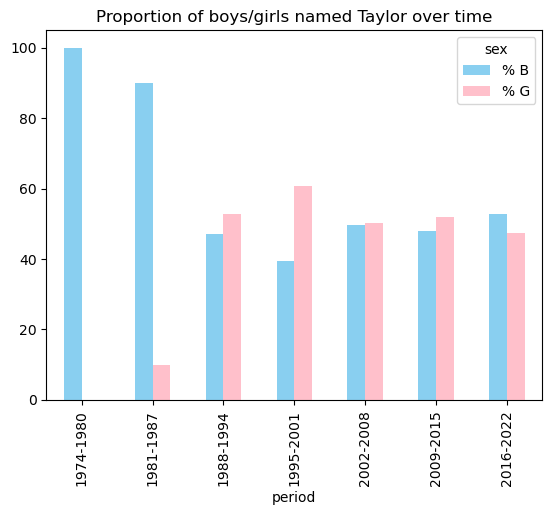

In [37]:
Taylor=popular_unisex_names[popular_unisex_names["FirstForename"]=="Taylor"][["period","% B","% G"]]
Taylor.plot.bar(x="period",
                color={'% B': "#89CFF0", '% G': 'pink'},
                title="Proportion of boys/girls named Taylor over time")


In the two decades since 1974, almost all newborn babies named Taylor were boys. After that, the number of girls named Taylor began to increase sharply and once surpassed boys in 1988-2001. Now, it is heading back towards a gender balance.

<br>Let's look at the name Rowan.

<Axes: title={'center': 'Number of boys/girls named Rowan over time'}, xlabel='year'>

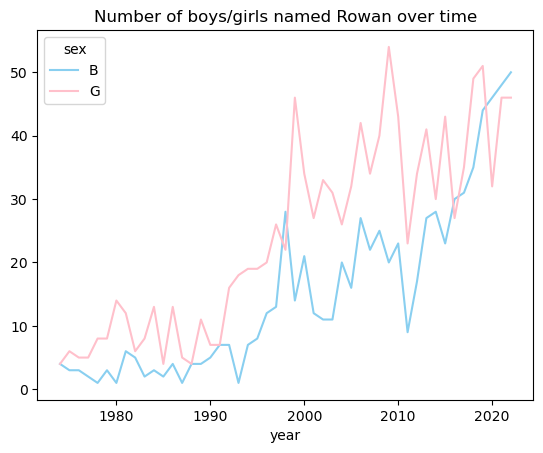

In [38]:
Rowan=names_subtable[names_subtable["FirstForename"]=="Rowan"].pivot_table("number",index="yr",columns="sex",aggfunc="sum").fillna(0)
Rowan.plot(color={'B': "#89CFF0", 'G': 'pink'},
          title="Number of boys/girls named Rowan over time",
          xlabel="year")

Rowan, another popular unisex name that is becoming increasingly popular with both sexes.

Let's look at the name Morgan.

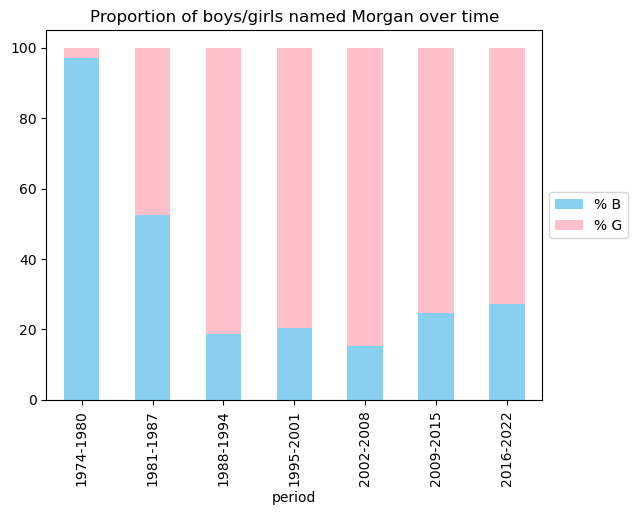

In [39]:
Morgan=popular_unisex_names[popular_unisex_names["FirstForename"]=="Morgan"][["period","% B","% G"]]

Morgan.plot.bar(x="period",
                 stacked=True,color={'% B': "#89CFF0", '% G': 'pink'},
                 title="Proportion of boys/girls named Morgan over time").legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Like Taylor, Morgan began as primarily a boy's name. It is now primarily a girl's name.